## Capstone Project - IMDB Dataset
### Title: Phase 3 & 4: : Votes Prediction
### By: Amita Saini

### Phase 3

1) Now make only 1 data frame of two CSV files using the join operation of pandas and start doing EDA.

2) Do the complete EDA in detail to explore the insights of data and write detailed observations of each analysis.


In [1]:
# Import necessary Libraries

import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import os
import numpy as np
from pathlib import Path
import re
from scipy.stats import linregress

In [2]:
# Read the directors_info.csv nto separate DataFrame
directors_df = pd.read_csv(r'C:\Users\TCS\Desktop\Project\Capstone IMDB\directors_info.csv')
directors_df.head()


,Sno,Movie Name,Duration,Year,Ratings,Metascore,Director1,Director2,Director3,Director4,Director5,Director6,Director7,Director8,Director9,Director10
0,1,Spider-Man: Across the Spider-Verse,140,2023,9.0,86.0,Joaquim Dos Santos,Kemp Powers,Justin K. Thompson,Shameik Moore,Hailee Steinfeld,Brian Tyree Henry,Luna Lauren Velez,NaN,NaN,NaN
1,2,The Dark Knight,152,2008,9.0,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,NaN,NaN,NaN,NaN,NaN
2,3,The Lord of the Rings: The Return of the King,201,2003,9.0,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,NaN,NaN,NaN,NaN,NaN
3,4,Inception,148,2010,8.8,74.0,Christopher Nolan,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,NaN,NaN,NaN,NaN,NaN
4,5,The Lord of the Rings: The Fellowship of the Ring,178,2001,8.8,92.0,Peter Jackson,Elijah Wood,Ian McKellen,Orlando Bloom,Sean Bean,NaN,NaN,NaN,NaN,NaN


In [3]:
# Read the stars_info.csv file into separate DataFrame
stars_df = pd.read_csv(r'C:\Users\TCS\Desktop\Project\Capstone IMDB\stars_info.csv')
stars_df.head()

,Movie Name,Votes,Gross collection,Popularity,Certification,Star1,Star2,Star3,Star4,Star5,Star6,Star7,Star8,Star9,Genre1,Genre2,Genre3
0,Spider-Man: Across the Spider-Verse,95163,95163,9.0,U,Kemp Powers,Justin K. Thompson,Shameik Moore,Hailee Steinfeld,Brian Tyree Henry,Luna Lauren Velez,NaN,NaN,NaN,Animation,Action,Adventure
1,The Dark Knight,2722695,"534,858,444",9.0,UA,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,NaN,NaN,NaN,NaN,NaN,Action,Crime,Drama
2,The Lord of the Rings: The Return of the King,1889533,"377,845,905",9.0,U,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,NaN,NaN,NaN,NaN,NaN,Action,Adventure,Drama
3,Inception,2416660,"292,576,195",8.8,UA,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,NaN,NaN,NaN,NaN,NaN,Action,Adventure,Sci-Fi
4,The Lord of the Rings: The Fellowship of the Ring,1918116,"315,544,750",8.8,U,Elijah Wood,Ian McKellen,Orlando Bloom,Sean Bean,NaN,NaN,NaN,NaN,NaN,Action,Adventure,Drama


In [4]:
# Perform an inner join on the 'Movie Name' column to merge the two DataFrames
df = directors_df.merge(stars_df, on='Movie Name', how='inner')



In [5]:
df.head()

,Sno,Movie Name,Duration,Year,Ratings,Metascore,Director1,Director2,Director3,Director4,...,Star3,Star4,Star5,Star6,Star7,Star8,Star9,Genre1,Genre2,Genre3
0,1,Spider-Man: Across the Spider-Verse,140,2023,9.0,86.0,Joaquim Dos Santos,Kemp Powers,Justin K. Thompson,Shameik Moore,...,Shameik Moore,Hailee Steinfeld,Brian Tyree Henry,Luna Lauren Velez,NaN,NaN,NaN,Animation,Action,Adventure
1,2,The Dark Knight,152,2008,9.0,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,...,Aaron Eckhart,Michael Caine,NaN,NaN,NaN,NaN,NaN,Action,Crime,Drama
2,3,The Lord of the Rings: The Return of the King,201,2003,9.0,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,...,Ian McKellen,Orlando Bloom,NaN,NaN,NaN,NaN,NaN,Action,Adventure,Drama
3,4,Inception,148,2010,8.8,74.0,Christopher Nolan,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,...,Elliot Page,Ken Watanabe,NaN,NaN,NaN,NaN,NaN,Action,Adventure,Sci-Fi
4,5,The Lord of the Rings: The Fellowship of the Ring,178,2001,8.8,92.0,Peter Jackson,Elijah Wood,Ian McKellen,Orlando Bloom,...,Orlando Bloom,Sean Bean,NaN,NaN,NaN,NaN,NaN,Action,Adventure,Drama


In [6]:
# Let us find shape of dataframe
df.shape 

(1815, 32)

<AxesSubplot:>

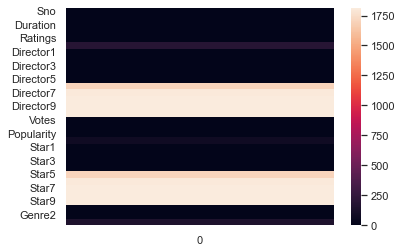

In [7]:
# Let us check for nullvalues
sns.heatmap(df.isnull().sum().to_frame())

In [8]:
# Let us check for basic informormation about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1815 entries, 0 to 1814
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Sno               1815 non-null   int64  
 1   Movie Name        1815 non-null   object 
 2   Duration          1815 non-null   int64  
 3   Year              1815 non-null   object 
 4   Ratings           1815 non-null   float64
 5   Metascore         1627 non-null   float64
 6   Director1         1815 non-null   object 
 7   Director2         1815 non-null   object 
 8   Director3         1814 non-null   object 
 9   Director4         1814 non-null   object 
 10  Director5         1813 non-null   object 
 11  Director6         113 non-null    object 
 12  Director7         13 non-null     object 
 13  Director8         6 non-null      object 
 14  Director9         3 non-null      object 
 15  Director10        1 non-null      object 
 16  Votes             1815 non-null   int64  


<AxesSubplot:>

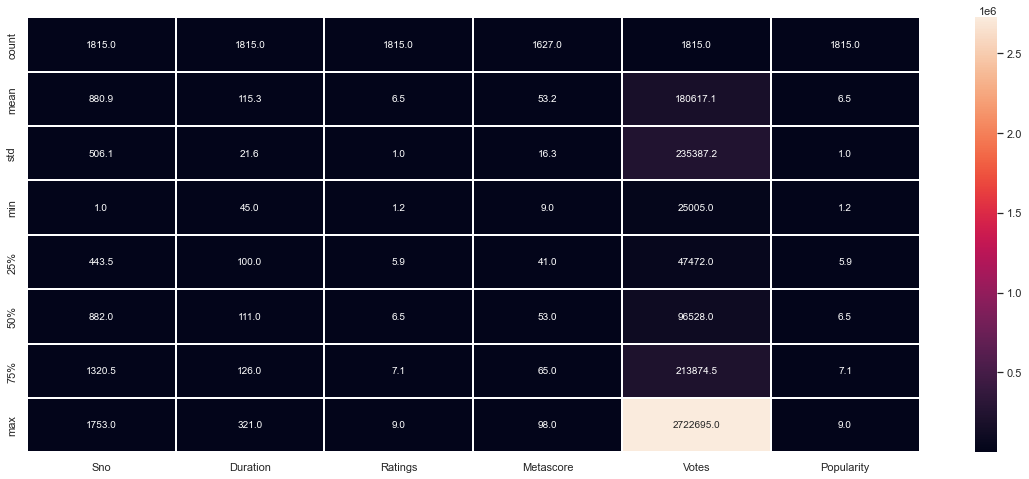

In [9]:
# Let us Visualize the statistics of the columns using heatmap.
plt.figure(figsize=(20,8))
sns.heatmap(df.describe(),linewidths = 0.1,fmt='0.1f',annot = True)

In [10]:
# Let us check for summary statistics of numerical columns.
df.describe()

,Sno,Duration,Ratings,Metascore,Votes,Popularity
count,1815.000000,1815.000000,1815.000000,1627.000000,1.815000e+03,1815.000000
mean,880.928926,115.265565,6.471736,53.220652,1.806171e+05,6.471736
std,506.109208,21.556034,0.996903,16.267517,2.353872e+05,0.996903
min,1.000000,45.000000,1.200000,9.000000,2.500500e+04,1.200000
25%,443.500000,100.000000,5.900000,41.000000,4.747200e+04,5.900000
50%,882.000000,111.000000,6.500000,53.000000,9.652800e+04,6.500000
75%,1320.500000,126.000000,7.100000,65.000000,2.138745e+05,7.100000
max,1753.000000,321.000000,9.000000,98.000000,2.722695e+06,9.000000


### Observations:
Count is same for all variables except Metascore. 75% and max values for Errors shows presence of possible outliers. 

### Data Cleaning

In [11]:
# Remove commas and convert 'Gross collection' column from object to float64
df['Gross collection'] = df['Gross collection'].str.replace(',', '').astype(float)

# Check the data types of the DataFrame
print(df.dtypes)


Sno                   int64
Movie Name           object
Duration              int64
Year                 object
Ratings             float64
Metascore           float64
Director1            object
Director2            object
Director3            object
Director4            object
Director5            object
Director6            object
Director7            object
Director8            object
Director9            object
Director10           object
Votes                 int64
Gross collection    float64
Popularity          float64
Certification        object
Star1                object
Star2                object
Star3                object
Star4                object
Star5                object
Star6                object
Star7                object
Star8                object
Star9                object
Genre1               object
Genre2               object
Genre3               object
dtype: object


In [12]:
# Filtering the data so it only includes the integers and floats

df = df.select_dtypes(include=['float64', 'int64', 'int'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1815 entries, 0 to 1814
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Sno               1815 non-null   int64  
 1   Duration          1815 non-null   int64  
 2   Ratings           1815 non-null   float64
 3   Metascore         1627 non-null   float64
 4   Votes             1815 non-null   int64  
 5   Gross collection  1815 non-null   float64
 6   Popularity        1815 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 113.4 KB


In [14]:
# Dropping Sno column as it does not affect Target variable
df = df.drop(['Sno'], axis=1)

In [15]:
# Dropping the null values and turning all features into the float format to make analysis easier

df = df.dropna().astype(float)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1627 entries, 0 to 1809
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Duration          1627 non-null   float64
 1   Ratings           1627 non-null   float64
 2   Metascore         1627 non-null   float64
 3   Votes             1627 non-null   float64
 4   Gross collection  1627 non-null   float64
 5   Popularity        1627 non-null   float64
dtypes: float64(6)
memory usage: 89.0 KB


## Exploratory Data Analysis

Text(0.5, 0, 'IMDB Ratings')

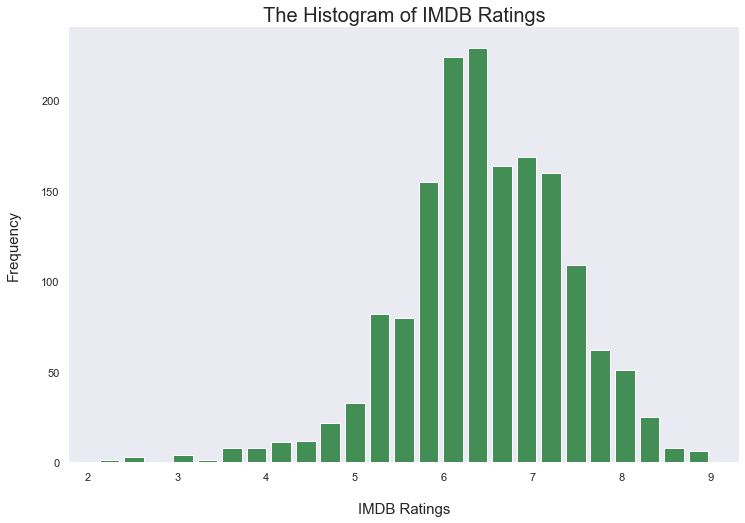

In [57]:
# Histogram of Movie Ratings

histplot = df.hist(column='Ratings', bins=25, grid=False, figsize=(12,8), color='#438E55',
                   zorder=2, rwidth=0.8)

sns.despine(left=True, bottom=True)

plt.title('The Histogram of IMDB Ratings', size=20)
plt.ylabel('Frequency', size=15, labelpad=20)
plt.xlabel('IMDB Ratings', size=15, labelpad=20)

In [58]:
df['Ratings'].value_counts

<bound method IndexOpsMixin.value_counts of 0       9.0
1       9.0
2       9.0
3       8.8
4       8.8
       ... 
1800    3.0
1803    2.6
1804    2.5
1807    2.4
1809    2.1
Name: Ratings, Length: 1627, dtype: float64>

### Observations:
The histogram shows most ratings fall between 5.5 and 7.5. High ratings (8 to 10) are rare.

Text(0.5, 0, 'IMDB Metascore')

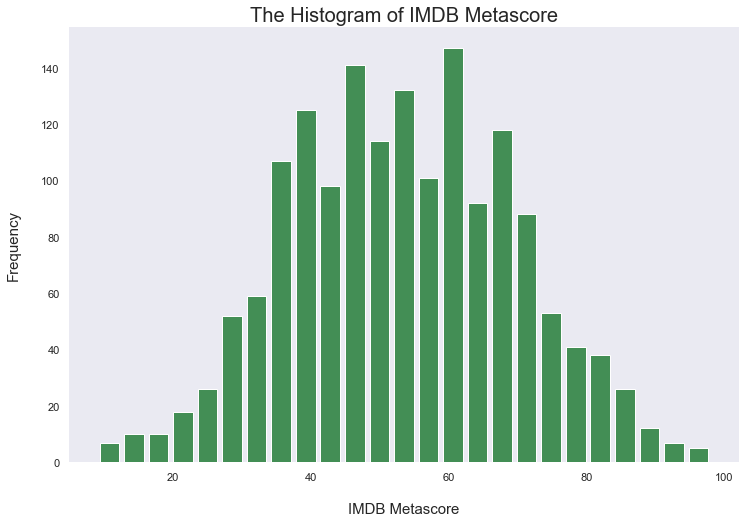

In [59]:
# Histogram of Metascore

histplot = df.hist(column='Metascore', bins=25, grid=False, figsize=(12,8), color='#438E55',
                   zorder=2, rwidth=0.8)

sns.despine(left=True, bottom=True)

plt.title('The Histogram of IMDB Metascore', size=20)
plt.ylabel('Frequency', size=15, labelpad=20)
plt.xlabel('IMDB Metascore', size=15, labelpad=20)

In [60]:
df['Metascore'].value_counts

<bound method IndexOpsMixin.value_counts of 0       86.0
1       84.0
2       94.0
3       74.0
4       92.0
        ... 
1800    18.0
1803    45.0
1804     9.0
1807     9.0
1809    15.0
Name: Metascore, Length: 1627, dtype: float64>

### Observations:
The histogram shows most Metascore fall between 30 and 70. High Metascore (80 to 100) are very less.



Text(0.5, 0, 'Movie Duration')

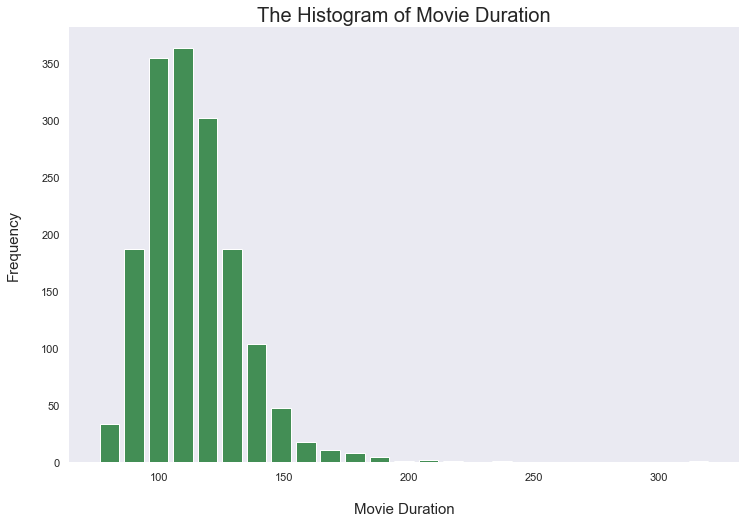

In [61]:
# Histogram of Movie Duration

histplot = df.hist(column='Duration', bins=25, grid=False, figsize=(12,8), color='#438E55',
                   zorder=2, rwidth=0.8)

sns.despine(left=True, bottom=True)

plt.title('The Histogram of Movie Duration', size=20)
plt.ylabel('Frequency', size=15, labelpad=20)
plt.xlabel('Movie Duration', size=15, labelpad=20)

In [62]:
df['Duration'].value_counts

<bound method IndexOpsMixin.value_counts of 0       140.0
1       152.0
2       201.0
3       148.0
4       178.0
        ...  
1800     95.0
1803     85.0
1804    118.0
1807     99.0
1809     90.0
Name: Duration, Length: 1627, dtype: float64>

#### Observations:
The histogram shows mostly movie duration falls between 100 and 150. High Metascore (150 to 250) are rare.

Text(0.5, 0, 'Movie Votes')

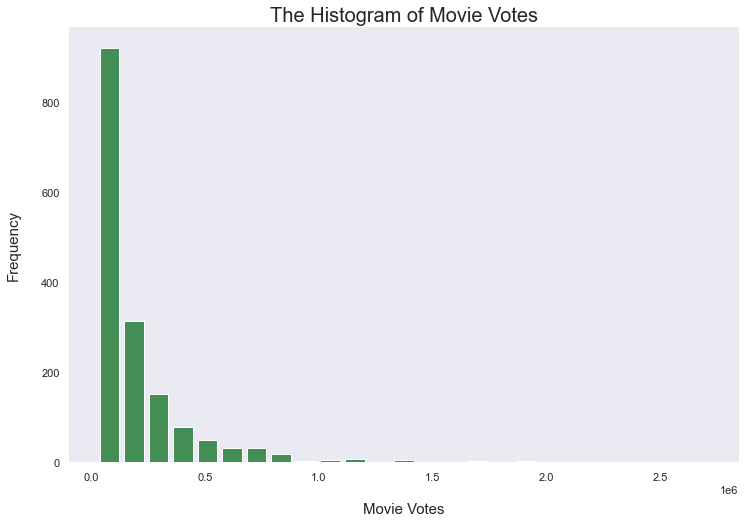

In [63]:
# Histogram of Movie Votes

histplot = df.hist(column='Votes', bins=25, grid=False, figsize=(12,8), color='#438E55',
                   zorder=2, rwidth=0.8)

sns.despine(left=True, bottom=True)

plt.title('The Histogram of Movie Votes', size=20)
plt.ylabel('Frequency', size=15, labelpad=20)
plt.xlabel('Movie Votes', size=15, labelpad=20)

In [64]:
df['Votes'].value_counts

<bound method IndexOpsMixin.value_counts of 0         95163.0
1       2722695.0
2       1889533.0
3       2416660.0
4       1918116.0
          ...    
1800      36464.0
1803      77077.0
1804      81614.0
1807      46339.0
1809      37995.0
Name: Votes, Length: 1627, dtype: float64>

#### Observations:
The histogram shows mostly movie Votes falls between 0.1x10^6 and 0.5x10^6. Votes more than 0.5x10^6 are rare.

Text(0.5, 0, 'Movie Popularity')

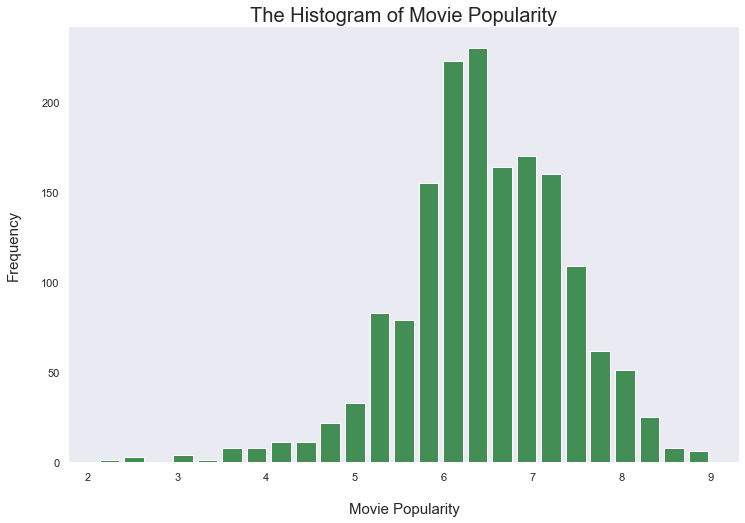

In [65]:
# Histogram of Movie Popularity

histplot = df.hist(column='Popularity', bins=25, grid=False, figsize=(12,8), color='#438E55',
                   zorder=2, rwidth=0.8)

sns.despine(left=True, bottom=True)

plt.title('The Histogram of Movie Popularity', size=20)
plt.ylabel('Frequency', size=15, labelpad=20)
plt.xlabel('Movie Popularity', size=15, labelpad=20)

In [66]:
df['Popularity'].value_counts

<bound method IndexOpsMixin.value_counts of 0       9.0
1       9.0
2       9.0
3       8.8
4       8.8
       ... 
1800    3.0
1803    2.6
1804    2.5
1807    2.4
1809    2.1
Name: Popularity, Length: 1627, dtype: float64>

#### Observations:
The histogram shows mostly movie Votes falls between 5 and 8. Votes more than 8 are rare.

Text(0.5, 0, 'Movie Gross collection')

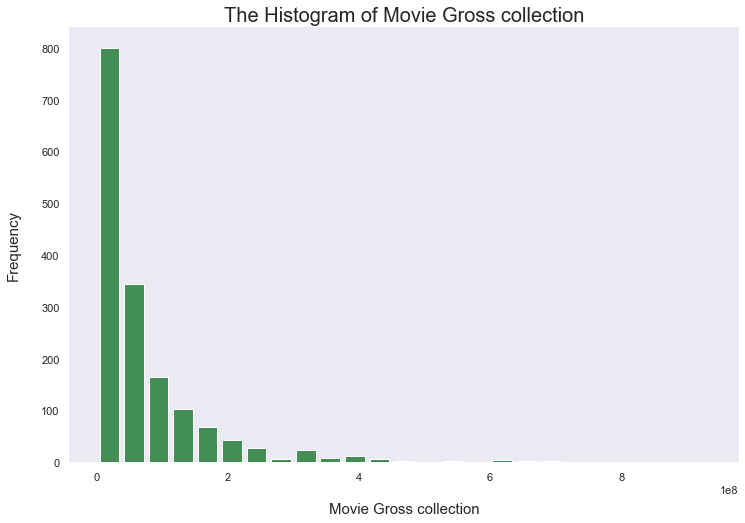

In [75]:
# Histogram of Movie Gross collection

histplot = df.hist(column='Gross collection', bins=25, grid=False, figsize=(12,8), color='#438E55',
                   zorder=2, rwidth=0.8)

sns.despine(left=True, bottom=True)

plt.title('The Histogram of Movie Gross collection', size=20)
plt.ylabel('Frequency', size=15, labelpad=20)
plt.xlabel('Movie Gross collection', size=15, labelpad=20)

In [76]:
df['Gross collection'].value_counts

<bound method IndexOpsMixin.value_counts of 0           95163.0
1       534858444.0
2       377845905.0
3       292576195.0
4       315544750.0
           ...     
1800      2405420.0
1803      9353573.0
1804     21471685.0
1807      5178569.0
1809     10249719.0
Name: Gross collection, Length: 1627, dtype: float64>

### Observations:
The histogram shows mostly movie Gross collection falls between .1x 10^8 to 2x 10^8. Votes more than 2x 10^8 are rare.

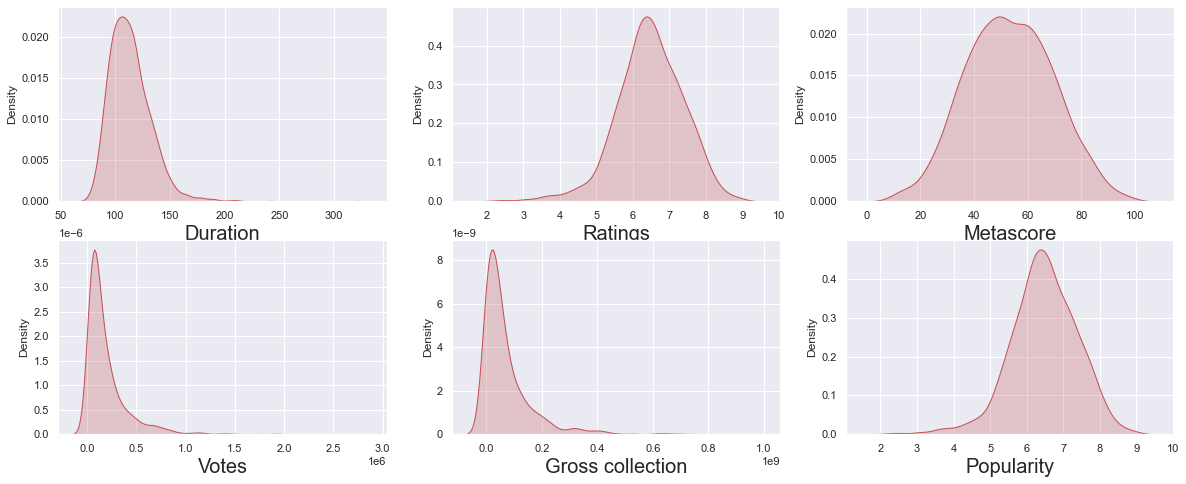

In [77]:
# Let us check distribution of features
plt.figure(figsize=(20,25), facecolor='white')
plotnumber =1
for column in df:
    if plotnumber <=17:
        ax = plt.subplot(6,3,plotnumber)
        sns.distplot(df[column], color='r',hist=False,kde_kws={"shade": True})
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

#### Observations:
So, Many features are left or right skewed

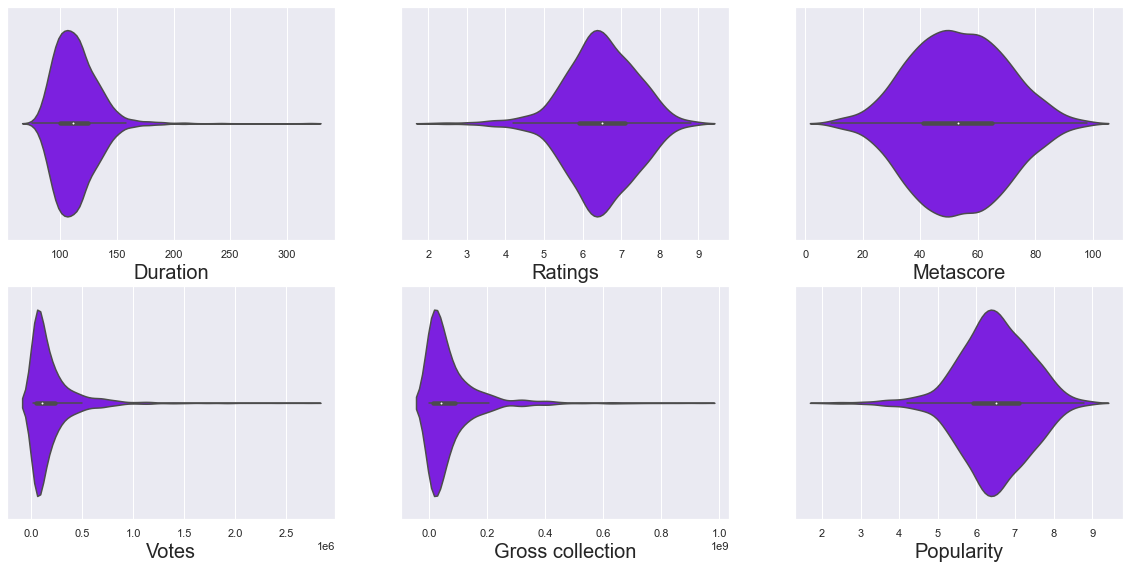

In [78]:
sns.set_palette('gist_rainbow_r')
plt.figure(figsize=(20,30), facecolor='white')
plotnumber =1
for column in df:
    if plotnumber <=17:
        ax = plt.subplot(6,3,plotnumber)
        sns.violinplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

#### Observations:

There is not much difference in Votes and Gross collection plots.

#### Votes Vs Ratings & Duration

Text(0, 0.5, 'Duration')

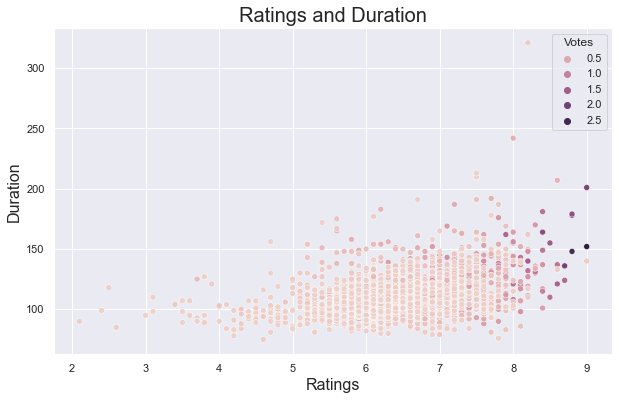

In [79]:
# Let us Check relation between Votes Vs Ratings and Duration
sns.set_palette('Set1')
plt.figure(figsize=[10,6])
plt.title('Ratings and Duration',fontsize =20)
sns.scatterplot(df['Ratings'],df['Duration'],hue=df['Votes'])
plt.xlabel('Ratings',fontsize =16)
plt.ylabel("Duration",fontsize =16)

#### Votes Vs Metascore & Popularity

Text(0, 0.5, 'Popularity')

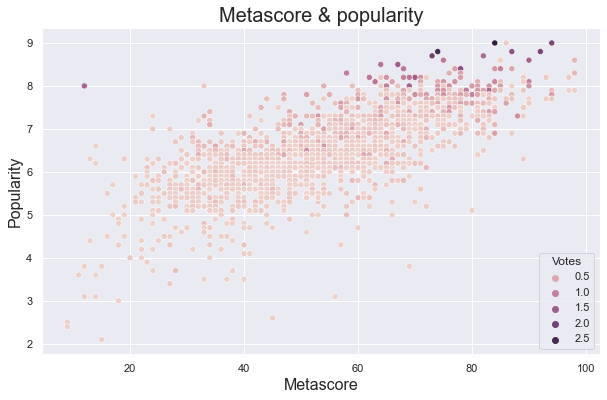

In [80]:
# Let us Check relation between Votes Vs Metascore & popularity
sns.set_palette('Set1')
plt.figure(figsize=[10,6])
plt.title('Metascore & popularity',fontsize =20)
sns.scatterplot(df['Metascore'],df['Popularity'],hue=df['Votes'])
plt.xlabel('Metascore',fontsize =16)
plt.ylabel("Popularity",fontsize =16)

#### Votes Vs Gross collection & Popularity

Text(0, 0.5, 'Popularity')

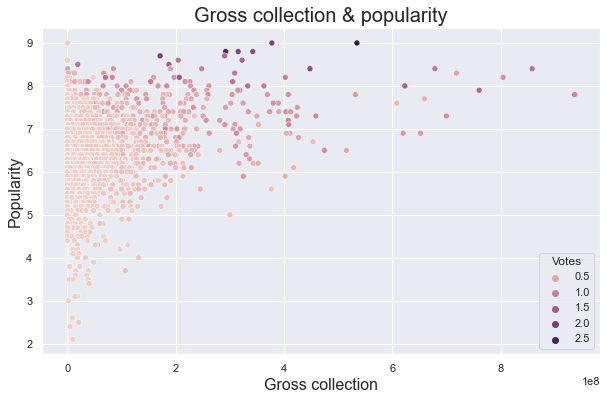

In [82]:
# Let us Check relation between Votes Vs Gross collection & popularity
sns.set_palette('Set1')
plt.figure(figsize=[10,6])
plt.title('Gross collection & popularity',fontsize =20)
sns.scatterplot(df['Gross collection'],df['Popularity'],hue=df['Votes'])
plt.xlabel('Gross collection',fontsize =16)
plt.ylabel("Popularity",fontsize =16)

#### Votes Vs Gross collection & Ratings

Text(0, 0.5, 'Ratings')

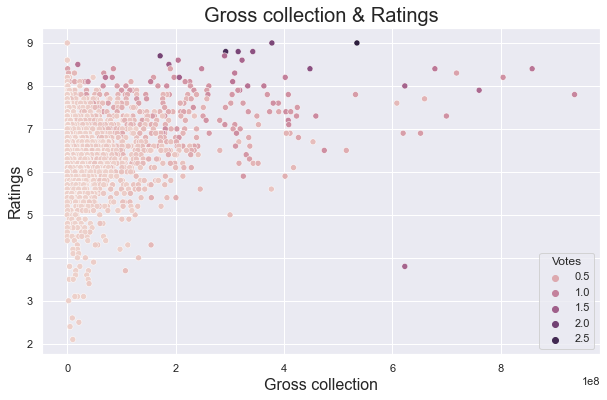

In [83]:
# Let us Check relation between Votes Vs Gross collection & Ratings
sns.set_palette('Set1')
plt.figure(figsize=[10,6])
plt.title('Gross collection & Ratings',fontsize =20)
sns.scatterplot(df['Gross collection'],df['Ratings'],hue=df['Votes'])
plt.xlabel('Gross collection',fontsize =16)
plt.ylabel("Ratings",fontsize =16)

#### Gross collection Vs Ratings and Duration

Text(0, 0.5, 'Duration')

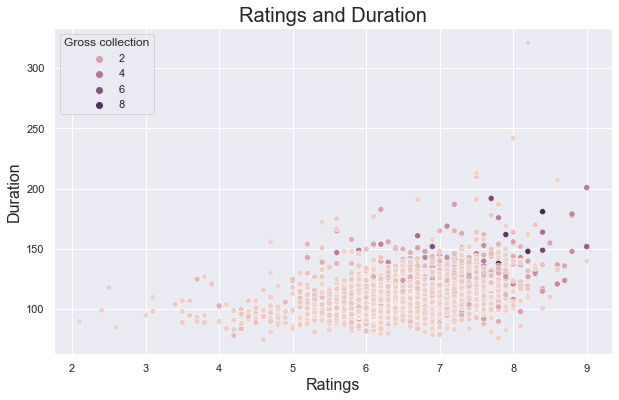

In [84]:
# Let us Check relation between Gross collection Vs Ratings and Duration
sns.set_palette('Set1')
plt.figure(figsize=[10,6])
plt.title('Ratings and Duration',fontsize =20)
sns.scatterplot(df['Ratings'],df['Duration'],hue=df['Gross collection'])
plt.xlabel('Ratings',fontsize =16)
plt.ylabel("Duration",fontsize =16)

#### Gross collection Vs Metascore and Popularity

Text(0, 0.5, 'Popularity')

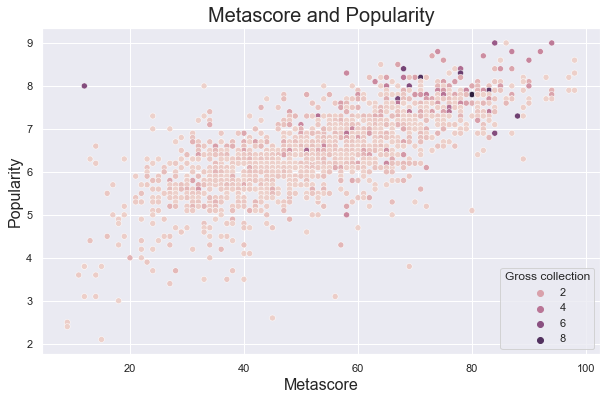

In [85]:
# Let us Check relation between Gross collection Vs Metascore and Popularity
sns.set_palette('Set1')
plt.figure(figsize=[10,6])
plt.title('Metascore and Popularity',fontsize =20)
sns.scatterplot(df['Metascore'],df['Popularity'],hue=df['Gross collection'])
plt.xlabel('Metascore',fontsize =16)
plt.ylabel("Popularity",fontsize =16)

#### Gross collection Vs Votes & popularity

Text(0, 0.5, 'Popularity')

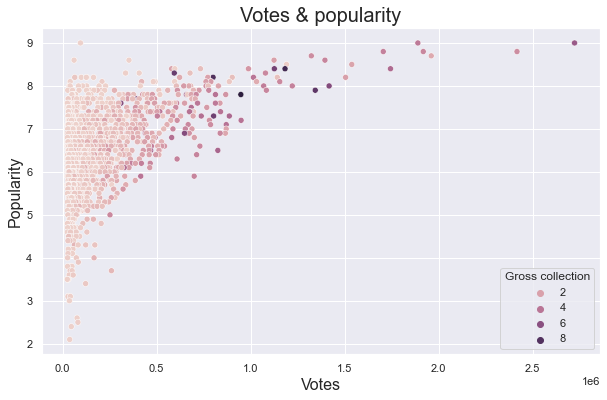

In [86]:
# Let us Check relation between Gross collection Vs Votes & popularity
sns.set_palette('Set1')
plt.figure(figsize=[10,6])
plt.title('Votes & popularity',fontsize =20)
sns.scatterplot(df['Votes'],df['Popularity'],hue=df['Gross collection'])
plt.xlabel('Votes',fontsize =16)
plt.ylabel("Popularity",fontsize =16)

#### Gross collection Vs Votes & Ratings

Text(0, 0.5, 'Ratings')

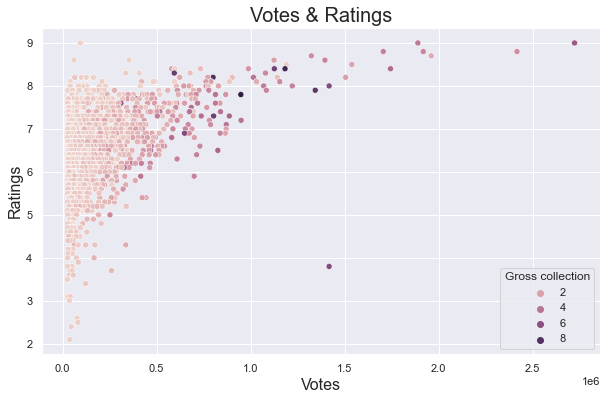

In [87]:
# Let us Check relation between Gross collection Vs Votes & Ratings
sns.set_palette('Set1')
plt.figure(figsize=[10,6])
plt.title('Votes & Ratings',fontsize =20)
sns.scatterplot(df['Votes'],df['Ratings'],hue=df['Gross collection'])
plt.xlabel('Votes',fontsize =16)
plt.ylabel("Ratings",fontsize =16)

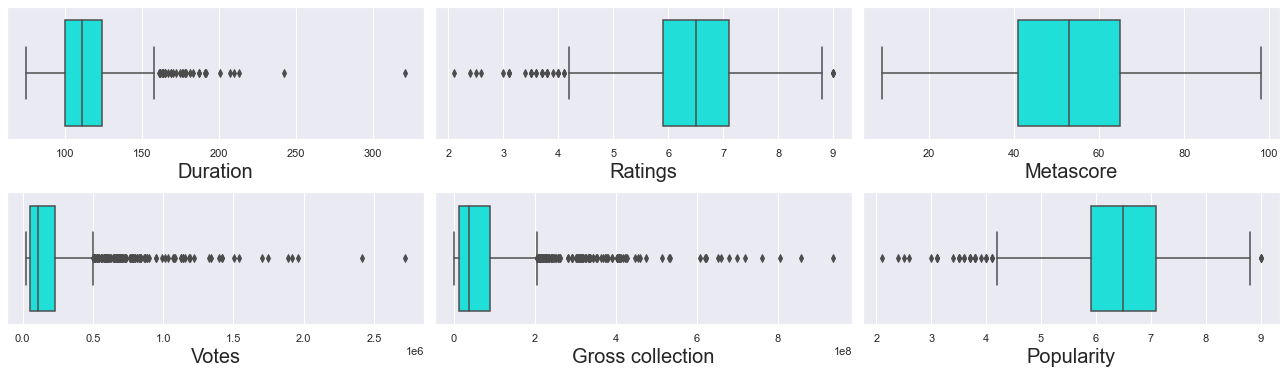

In [88]:
# Let us draw BoxPlot of Features:

plt.figure(figsize=(18,15), facecolor='white')
plotnumber =1
for column in df:
    if plotnumber <=18:
        ax = plt.subplot(6,3,plotnumber)
        sns.boxplot(df[column], palette='hsv')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

#### Observations :

Outliers are present but data belongs to Real world. So, these outliers are valid datapoints.


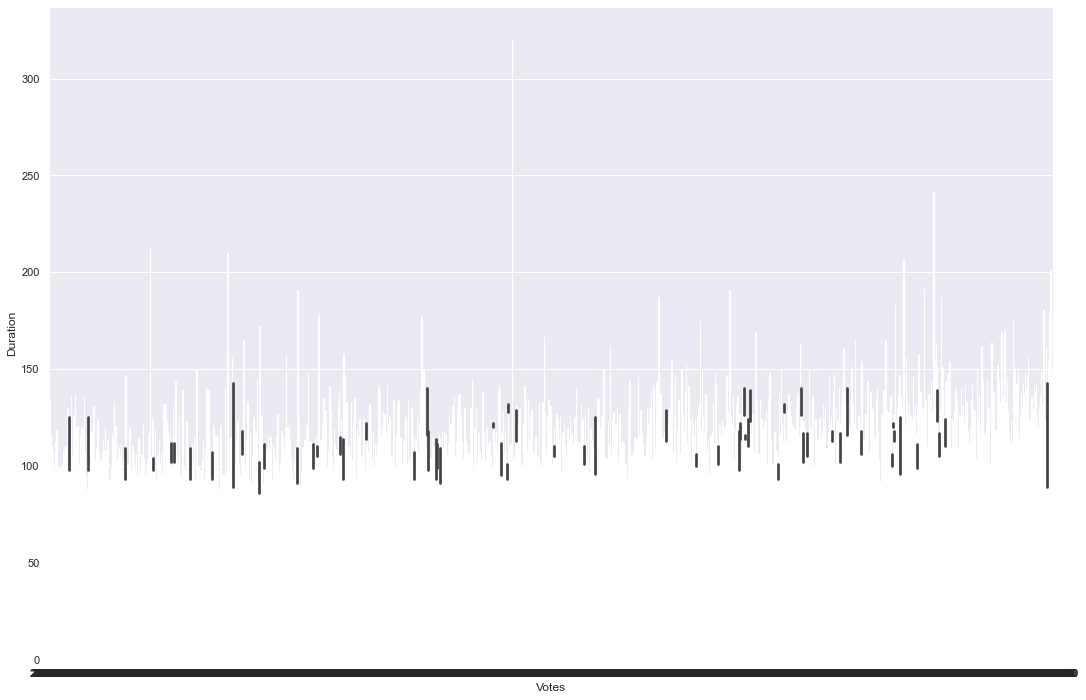

In [89]:
plt.figure(figsize=(18,12))
sns.barplot(x="Votes", y="Duration", data=df,palette='PiYG')
plt.show()

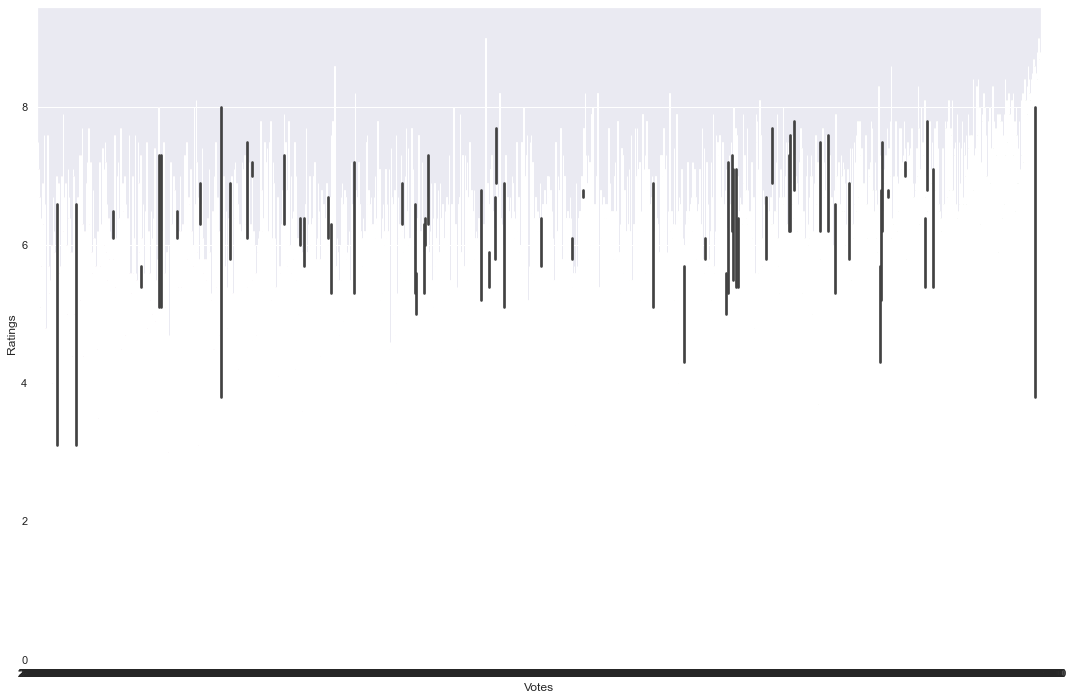

In [90]:
plt.figure(figsize=(18,12))
sns.barplot(x="Votes", y="Ratings", data=df,palette='PiYG')
plt.show()

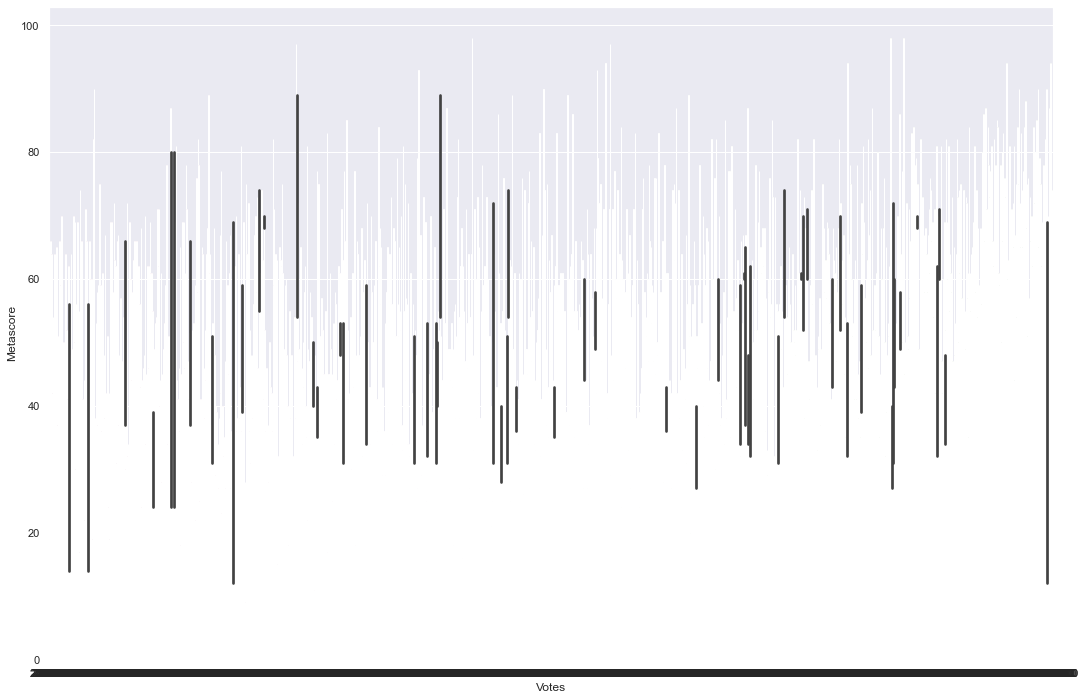

In [91]:
plt.figure(figsize=(18,12))
sns.barplot(x="Votes", y="Metascore", data=df,palette='PiYG')
plt.show()

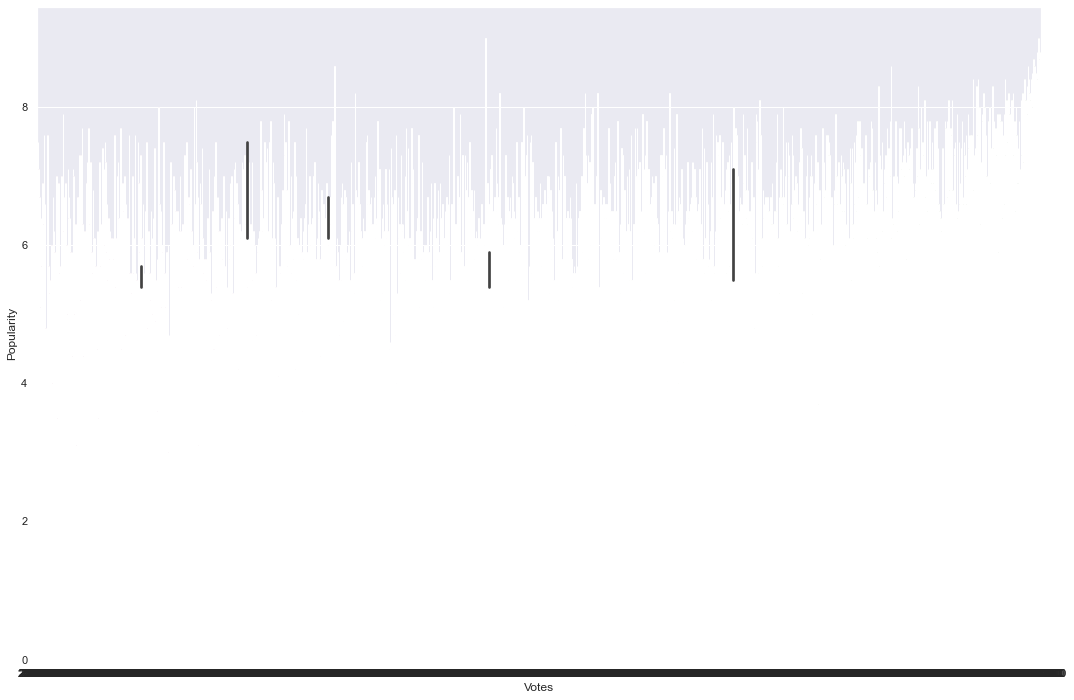

In [92]:
plt.figure(figsize=(18,12))
sns.barplot(x="Votes", y="Popularity", data=df,palette='PiYG')
plt.show()

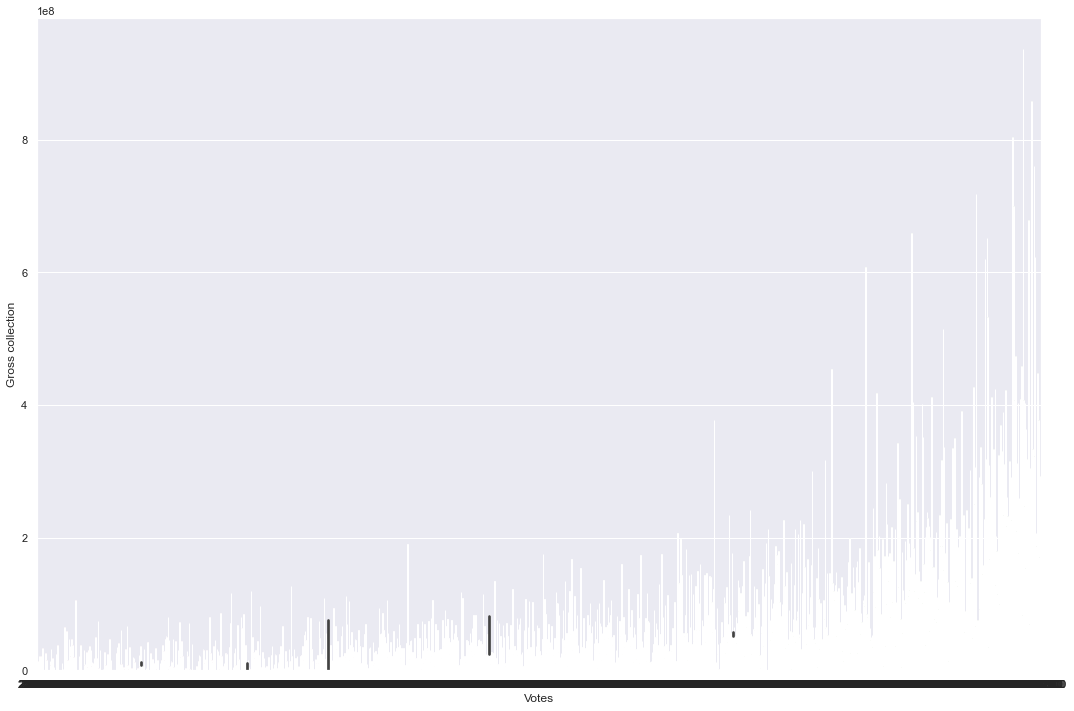

In [93]:
plt.figure(figsize=(18,12))
sns.barplot(x="Votes", y="Gross collection", data=df,palette='PiYG')
plt.show()

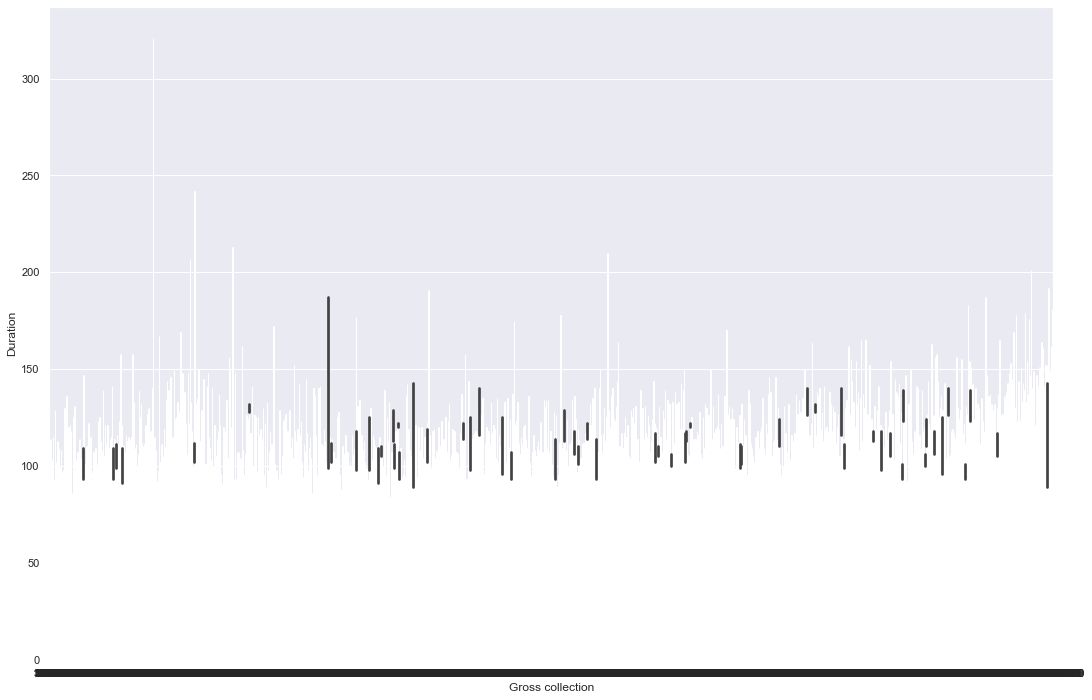

In [94]:
plt.figure(figsize=(18,12))
sns.barplot(x="Gross collection", y="Duration", data=df,palette='PiYG')
plt.show()

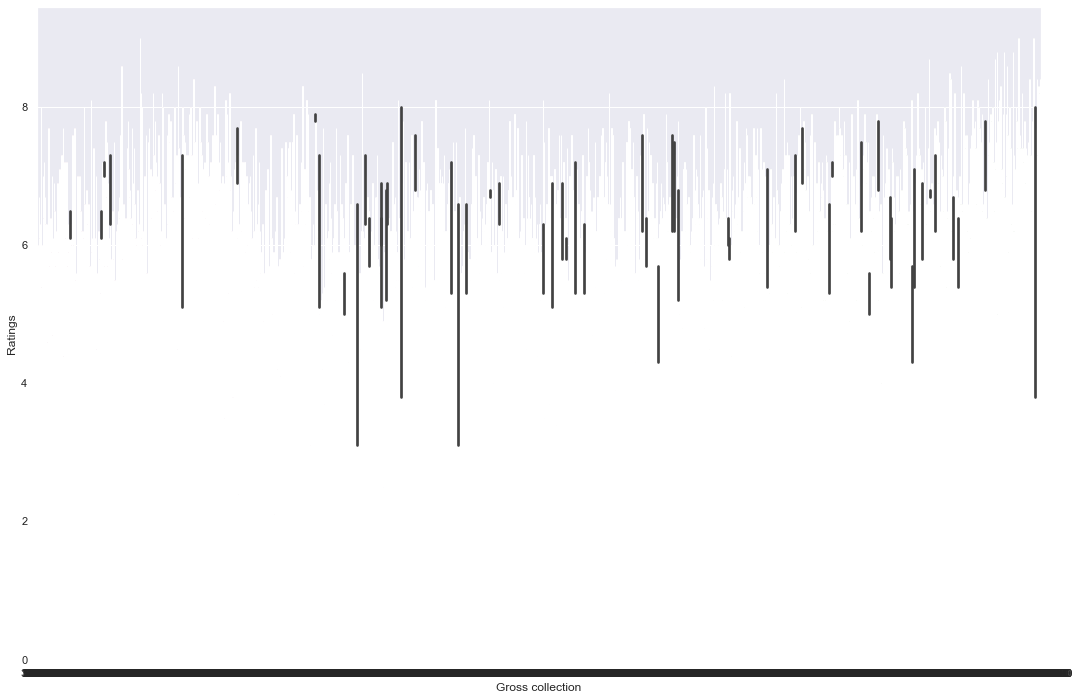

In [95]:
plt.figure(figsize=(18,12))
sns.barplot(x="Gross collection", y="Ratings", data=df,palette='PiYG')
plt.show()

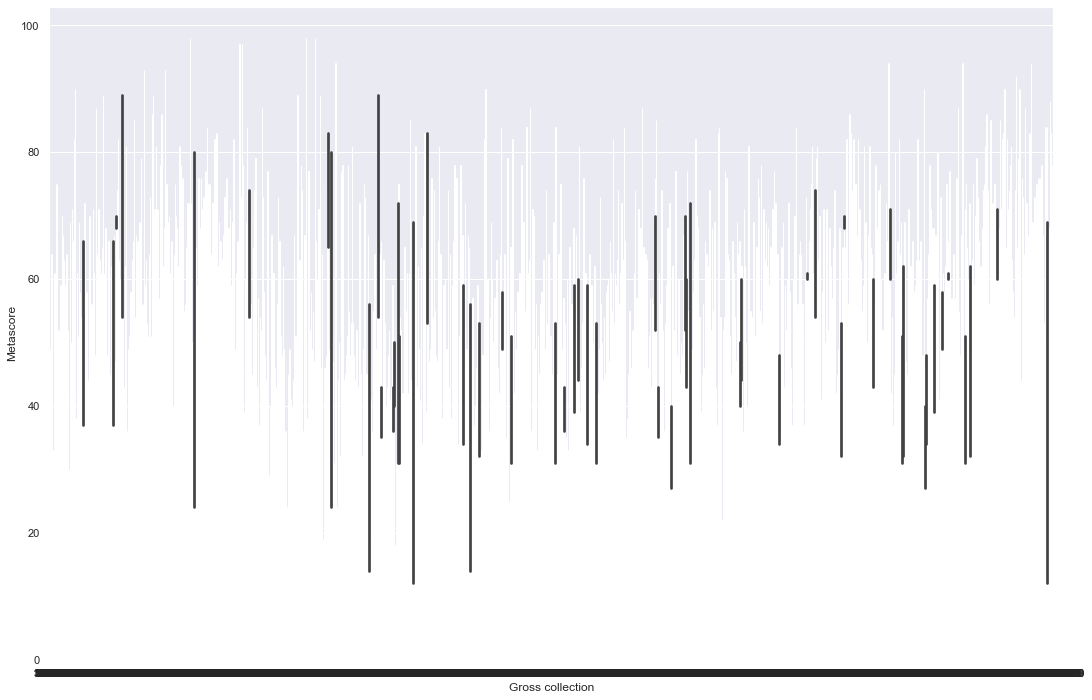

In [96]:
plt.figure(figsize=(18,12))
sns.barplot(x="Gross collection", y="Metascore", data=df,palette='PiYG')
plt.show()

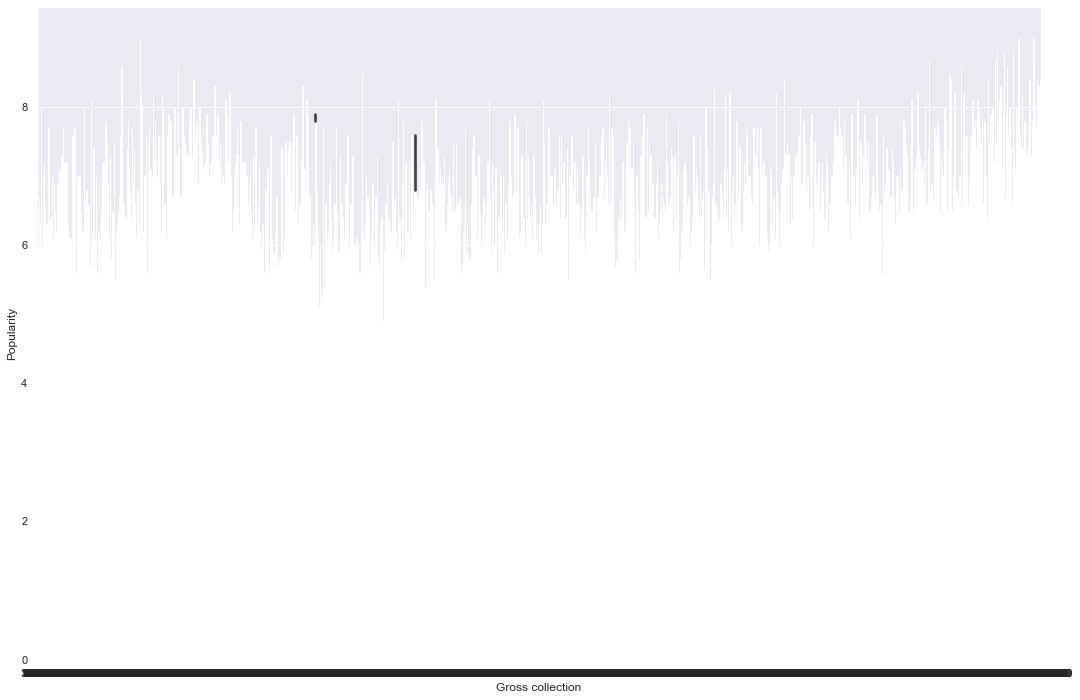

In [97]:
plt.figure(figsize=(18,12))
sns.barplot(x="Gross collection", y="Popularity", data=df,palette='PiYG')
plt.show()

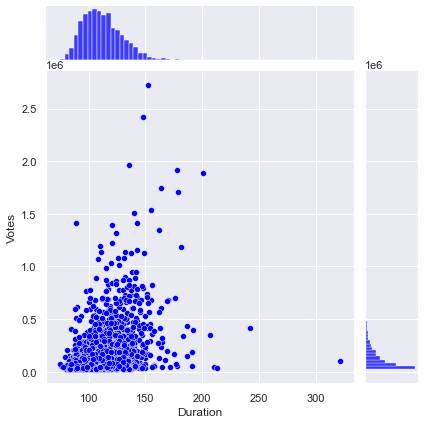

In [98]:
# Relationship between Duration and Votes through jointplot.
sns.jointplot(x="Duration", y="Votes", data=df, color="blue",palette="Set1")

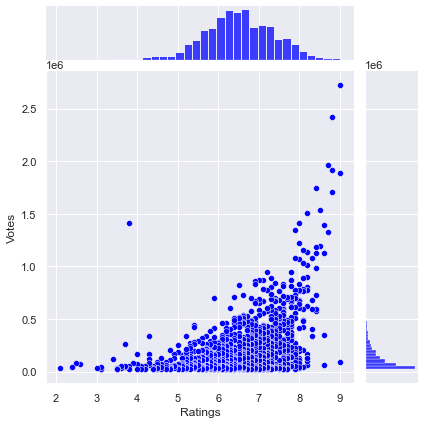

In [99]:
# Relationship between Ratings and Votes through jointplot.
sns.jointplot(x="Ratings", y="Votes", data=df, color="blue",palette="Set1")

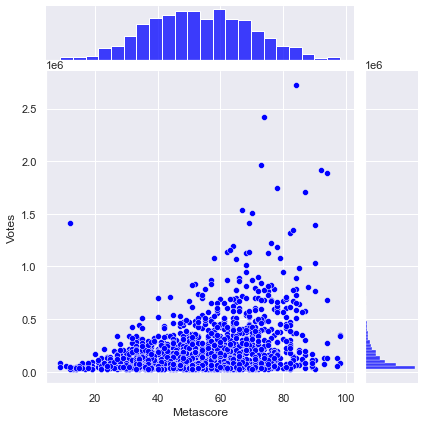

In [100]:
# Relationship between Metascore and Votes through jointplot.
sns.jointplot(x="Metascore", y="Votes", data=df, color="blue",palette="Set1")

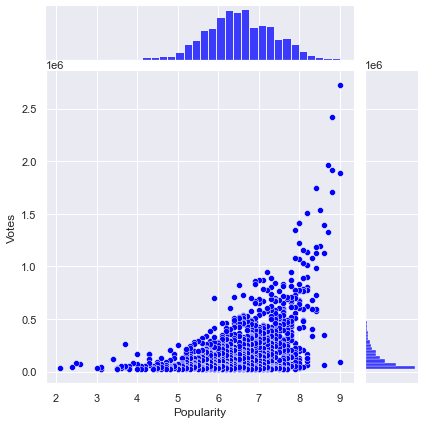

In [101]:
# Relationship between Popularity and Votes through jointplot.
sns.jointplot(x="Popularity", y="Votes", data=df, color="blue",palette="Set1")

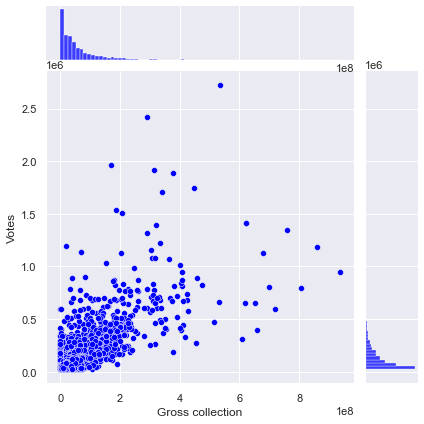

In [102]:
# Relationship between Votes and Gross collection through jointplot.
sns.jointplot(x="Gross collection", y="Votes", data=df, color="blue",palette="Set1")

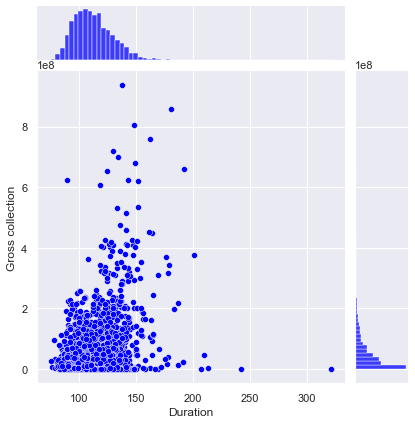

In [103]:
# Relationship between Duration and Gross collection through jointplot.
sns.jointplot(x="Duration", y="Gross collection", data=df, color="blue",palette="Set1")

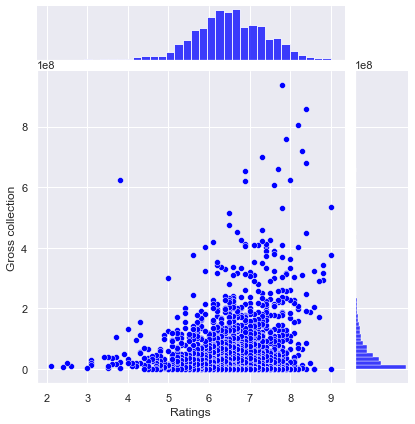

In [104]:
# Relationship between Ratings and Gross collection through jointplot.
sns.jointplot(x="Ratings", y="Gross collection", data=df, color="blue",palette="Set1")

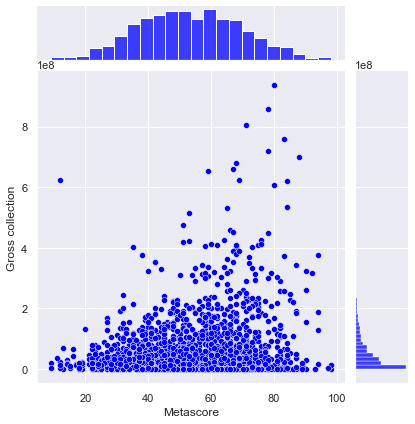

In [105]:
# Relationship between Metascore and Gross collection through jointplot.
sns.jointplot(x="Metascore", y="Gross collection", data=df, color="blue",palette="Set1")

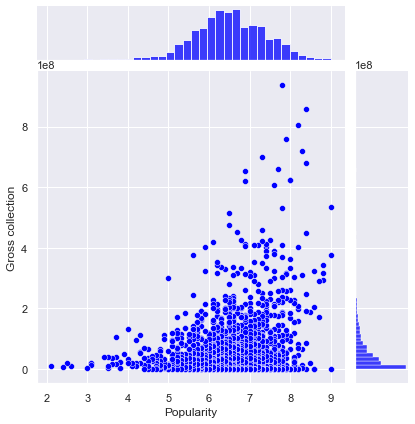

In [106]:
# Relationship between Popularity and Gross collection through jointplot.
sns.jointplot(x="Popularity", y="Gross collection", data=df, color="blue",palette="Set1")

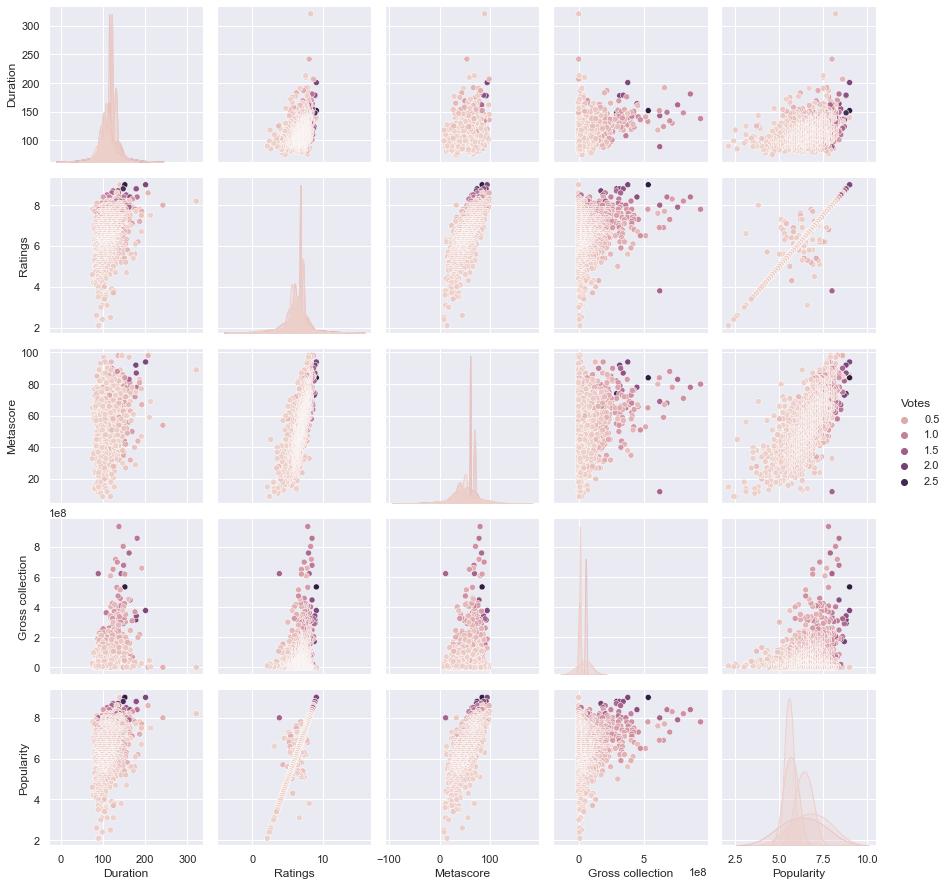

In [107]:
sns.pairplot(df, hue="Votes")

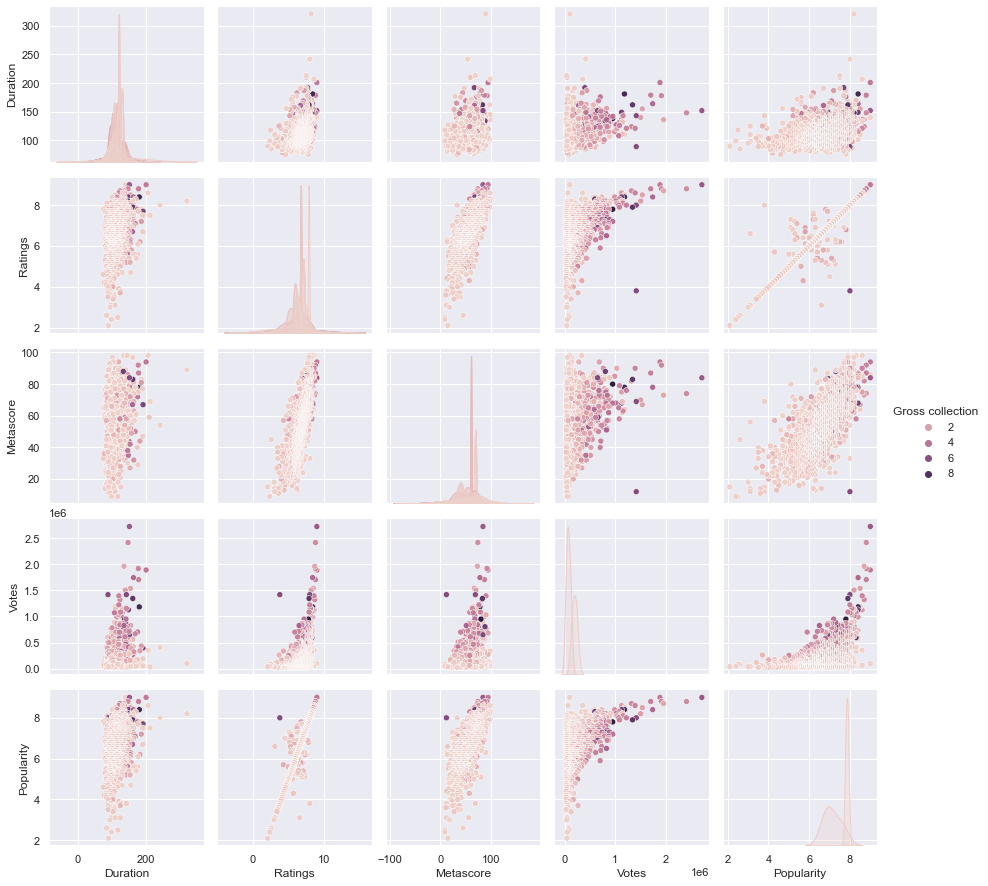

In [108]:
sns.pairplot(df, hue="Gross collection")

In [17]:
# Let us process Outliers detection and Removal
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

In [18]:
print("\033[1m"+'Shape of dataset after removing outliers :'+"\033[0m",df1.shape)

Shape of dataset after removing outliers : (1538, 6)


In [19]:
# Let us Check Data Loss
print("\033[1m"+'Percentage Data Loss :'+"\033[0m",((30-29)/30)*100,'%')

Percentage Data Loss : 3.3333333333333335 %


### Feature selection and Engineering

In [20]:
df1.skew()

Duration            0.602989
Ratings            -0.203817
Metascore           0.106566
Votes               1.884676
Gross collection    1.776909
Popularity         -0.217633
dtype: float64

In [21]:
# Let us Transform positive or right skewed data using boxcox transformation
from scipy.stats import boxcox

In [22]:
df1['Votes']=boxcox(df1['Votes'],-1.4)

In [23]:
df1['Gross collection']=boxcox(df1['Gross collection'],0.5)

In [24]:
df1['Duration']=boxcox(df1['Duration'],0.5)

In [25]:
# Skewness after transforming features
df1.skew()

Duration            0.412341
Ratings            -0.203817
Metascore           0.106566
Votes               0.000000
Gross collection    0.424147
Popularity         -0.217633
dtype: float64

#### Observations:
All features skewness is now transform within limit of -0.5 to 0.5

In [26]:
# Corrleation
df1.corr()

,Duration,Ratings,Metascore,Votes,Gross collection,Popularity
Duration,1.000000,0.340803,0.262823,0.290996,0.264501,0.330148
Ratings,0.340803,1.000000,0.738908,0.285461,0.130640,0.955558
Metascore,0.262823,0.738908,1.000000,0.162558,0.093275,0.704029
Votes,0.290996,0.285461,0.162558,1.000000,0.559204,0.288896
Gross collection,0.264501,0.130640,0.093275,0.559204,1.000000,0.131225
Popularity,0.330148,0.955558,0.704029,0.288896,0.131225,1.000000


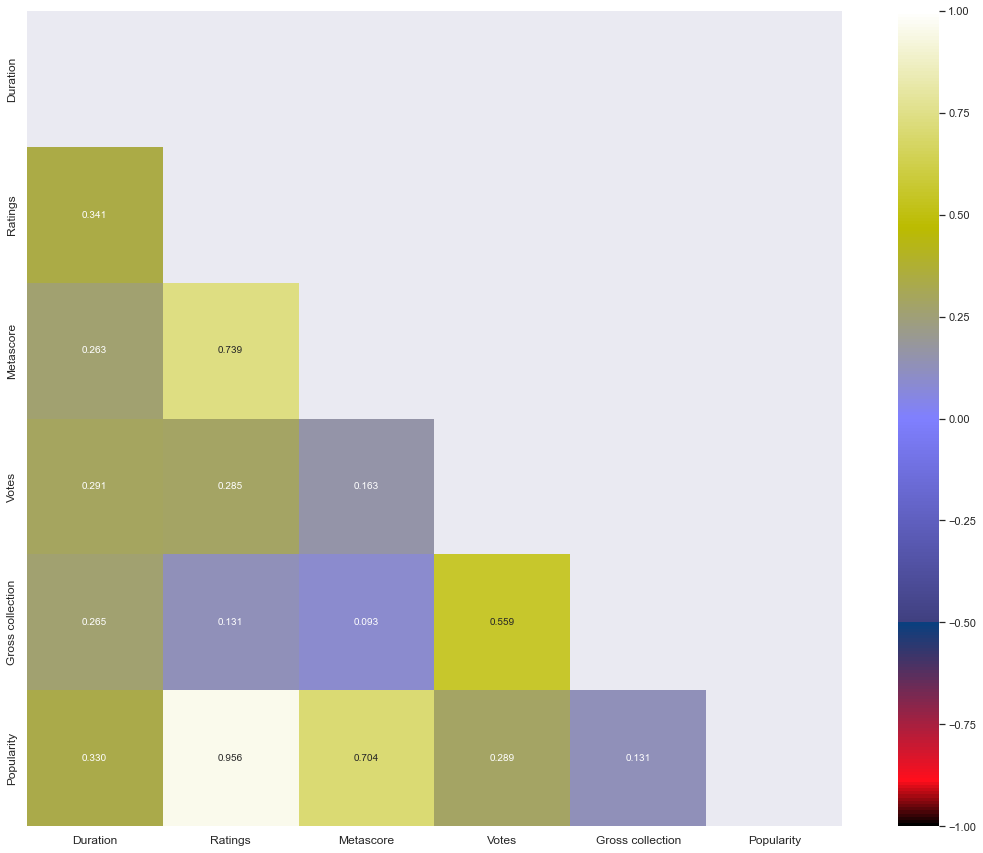

In [27]:
upper_triangle = np.triu(df.corr())
plt.figure(figsize=(20,15))
sns.heatmap(df1.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="gist_stern", mask=upper_triangle)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### Target Variable: Gross Collection

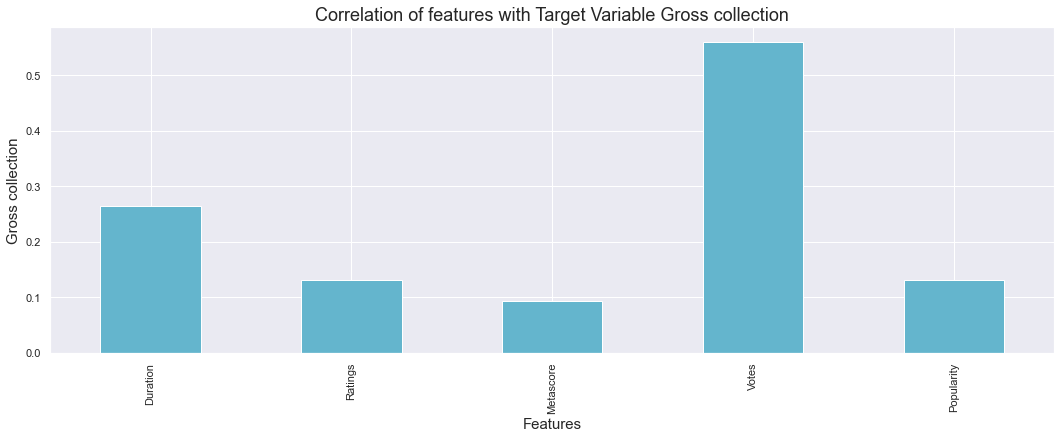

In [28]:
plt.figure(figsize = (18,6))
df1.corr()['Gross collection'].drop(['Gross collection']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Gross collection',fontsize=15)
plt.title('Correlation of features with Target Variable Gross collection',fontsize = 18)
plt.show()

#### Observations: 
Metascore is very poorly correlated with target variable. Votes, Duration, Ratings and Popularity are highly correleated with target variable. 

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(df1.values,i) for i in range(df1.shape[1])]
vif['Features']= df1.columns
vif

,VIF,Features
0,185.412318,Duration
1,806.878521,Ratings
2,27.258629,Metascore
3,189.249147,Votes
4,3.424907,Gross collection
5,720.512558,Popularity


#### Observations: 
Multicollinearity observed due to interrelations with each features

#### Addressing Multicollinearity :
Removing Some of highly correlated features. But this will not work here as most of input features are correlated with each other either moderated or poorly.
Address Multicollinerity is to Scaled Data and then apply PCA. - Let us proceed for this option.

In [30]:
# Standard Scaling
X=df1.drop(columns =['Gross collection'])
Y=df1['Gross collection']

In [31]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

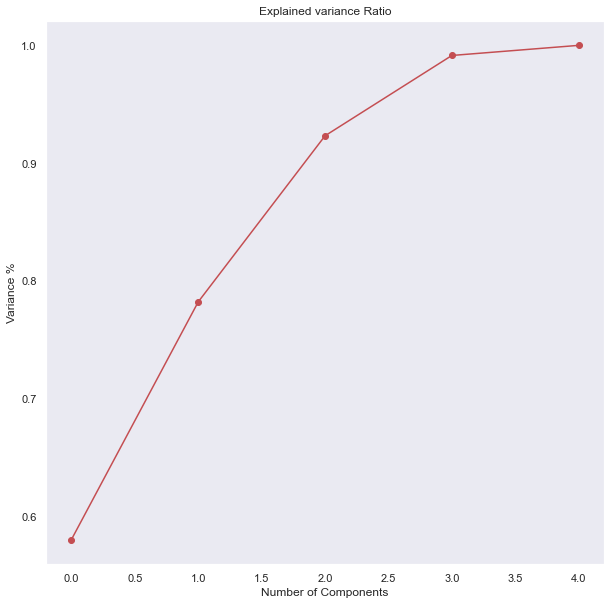

In [32]:
# PCA
from sklearn.decomposition import PCA
pca = PCA()
# Let us plot the graph to find the principal components
x_pca = pca.fit_transform(X_scale)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

#### Observations:

As per the graph,3 principal components attribute for 95% of variation in the data. Let us pick the first 3 components for our prediction.

In [33]:
pca_new = PCA(n_components=3)
x_new = pca_new.fit_transform(X_scale)

In [34]:
principle_x=pd.DataFrame(x_new,columns=np.arange(3))

In [35]:
# Let us Check Multicollinearity after applying PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(principle_x.values,i) for i in range(principle_x.shape[1])]
vif['Features']= principle_x.columns
vif

,VIF,Features
0,1.0,0
1,1.0,1
2,1.0,2


#### Observations:
As per above details, Multicollinearity issue is clear now.

## Phase 4: Machine Learning Model Building

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  Ridge
from sklearn.linear_model import  Lasso
from xgboost import XGBRegressor

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=42, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (1076, 3)
Training target vector size: (1076,)
Test feature matrix size: (462, 3)
Test target vector size: (462,)


### Let us find Best Random state

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_score=0
maxRS=0
for i in range(1,250):
    X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=i, test_size=.25)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,Y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)

Best R2 Score is 0.4108023666180478 on Random_state 92


### Let us do Linear Regression : Base model

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=217, test_size=.25)
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)
lin_reg.score(X_train,Y_train)
y_pred=lin_reg.predict(X_test)
print('\033[1m'+'Predicted Votes:'+'\033[0m\n',y_pred)
print('\n')
print('\033[1m'+'Actual Votes:'+'\033[0m\n',Y_test)

Predicted Votes:
 [17282.16772328 14569.26128297 17473.92415254 16642.41796299
  3560.91434384  2665.40168742  9130.80400976 16647.25782848
 11820.41845271 18771.47961276  7684.23803671  2504.67120624
 14309.35366261 16840.27862745 16863.43378839  6175.53330754
  6092.45172415 15787.98204114 16782.66235715 18131.11305818
 16744.48664933 14758.19965789 15953.01721344 14121.36210719
  5987.27887198  5881.00017987 18896.46479848  8298.05031657
  4283.20853114 13350.39172216 17776.08749736 13945.07189673
 16114.61219225 16313.96196587 16207.16800589 16077.0162768
 16309.17932382 14068.96400722 11512.36575176 16602.68591448
 14141.39869849 12218.73392783 11592.88548011 13167.18779162
 15700.82613915 17079.1654462   1327.90770754  8887.15632798
  3918.02467302 11736.31195175  7047.89881455 10364.10975323
 10350.83129547 17915.60517225 16714.02067593 14196.86176104
  7250.19105454 12367.34365837 13976.77370105  9159.25474738
 15721.49012296 13766.18224605 10167.76030645 14426.08824172
 14571.

### Let us do Linear Regression Evaluation Matrix

In [40]:
print('\033[1m'+' Error :'+'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
from sklearn.metrics import r2_score
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(Y_test,y_pred,multioutput='variance_weighted'))

 Error :
Mean absolute error : 5477.484264424525
Mean squared error : 48030500.78214021
Root Mean Squared Error: 6930.404085054508


 R2 Score :
0.3560136842992706


 True Values Vs Predicted Value plot :


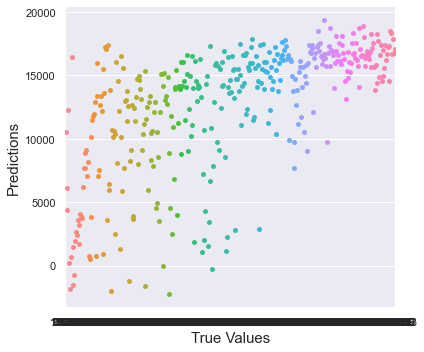

In [41]:
plt.figure(figsize=(6,5))
y_pred=lin_reg.predict(X_test)
sns.swarmplot(Y_test.round(2), y_pred)
print('\033[1m'+' True Values Vs Predicted Value plot :' +'\033[0m')
plt.xlabel('True Values' , fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.tight_layout()

### Let us find best n_neighbors for KNN Regressor

In [42]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_val = [] #to store rmse values for different k
for K in range(10):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train,Y_train)  #fit the model
    y_pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(Y_test,y_pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 8919.1947726741
RMSE value for k=  2 is: 7863.749903804234
RMSE value for k=  3 is: 7364.638042206928
RMSE value for k=  4 is: 7132.74889703983
RMSE value for k=  5 is: 7070.229666032071
RMSE value for k=  6 is: 7068.757659295348
RMSE value for k=  7 is: 6839.5394386469425
RMSE value for k=  8 is: 6823.612259676489
RMSE value for k=  9 is: 6747.506067605159
RMSE value for k=  10 is: 6736.789529422673


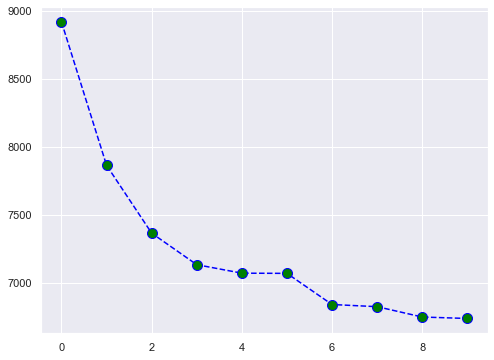

In [43]:
# Let us plot the rmse values against k values -
plt.figure(figsize = (8,6))
plt.plot(range(10), rmse_val, color='blue', linestyle='dashed', marker='o', markerfacecolor='green', markersize=10)

#### Observations: 
At k= 8, minimum RMSE value which is approx 6700, and shoots up on further increasing the k value. So, k=9 will give the best result in this case

In [44]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso, Ridge
from xgboost import XGBRegressor
from sklearn import metrics

rf = RandomForestRegressor(n_estimators=250, max_depth=6)
svr = SVR(C=1.0, epsilon=0.2, kernel='poly', gamma='auto')
dtc = DecisionTreeRegressor(criterion='friedman_mse')  # Change the criterion to a valid option
adb = AdaBoostRegressor(learning_rate=0.1)
gradb = GradientBoostingRegressor(max_depth=6, learning_rate=0.1)
knn = KNeighborsRegressor(n_neighbors=4, algorithm='kd_tree')
ls = Lasso(alpha=1e-2, max_iter=100000)
rd = Ridge(alpha=1e-2)
xgb = XGBRegressor()

models = [rf, ls, rd, svr, dtc, adb, gradb, knn, xgb]

for model in models:
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    
    print('\n')
    print('\033[1m' + ' Error of', model, ':' + '\033[0m')
    print('Mean absolute error:', metrics.mean_absolute_error(Y_test, y_pred))
    print('Mean squared error:', metrics.mean_squared_error(Y_test, y_pred))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))
    print('\n')
    print('\033[1m' + ' R2 Score :' + '\033[0m')
    print(metrics.r2_score(Y_test, y_pred))
    print('==============================================================================================================')




 Error of RandomForestRegressor(max_depth=6, n_estimators=250) :
Mean absolute error: 5186.8428076083555
Mean squared error: 42632259.20327768
Root Mean Squared Error: 6529.338343452396


 R2 Score :
0.4283925612425409


 Error of Lasso(alpha=0.01, max_iter=100000) :
Mean absolute error: 5477.484069207438
Mean squared error: 48030501.501867756
Root Mean Squared Error: 6930.404136979874


 R2 Score :
0.35601367464926315


 Error of Ridge(alpha=0.01) :
Mean absolute error: 5477.48391840508
Mean squared error: 48030503.65518909
Root Mean Squared Error: 6930.404292333103


 R2 Score :
0.35601364577782835


 Error of SVR(epsilon=0.2, gamma='auto', kernel='poly') :
Mean absolute error: 6643.009831842578
Mean squared error: 70981065.31600057
Root Mean Squared Error: 8425.026131472861


 R2 Score :
0.048295687261264764


 Error of DecisionTreeRegressor(criterion='friedman_mse') :
Mean absolute error: 6912.878603388955
Mean squared error: 79076622.34699215
Root Mean Squared Error: 8892.503716

### Let us do Hyper Parameter Tuning : GridSearchCV

In [47]:
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.linear_model import Lasso

parameters = {
    'alpha': np.array([1, 0.5, 0.1, 0.01, 0.001, 0.0001]),
    'fit_intercept': [True, False],
    'max_iter': [250, 500, 1000, 1500],
    'random_state': np.arange(100),
    'selection': ["cyclic", "random"]
}

GCV = GridSearchCV(Lasso(), parameters, cv=5, n_jobs=-1, verbose=3)
GCV.fit(X_train, Y_train)


Fitting 5 folds for each of 9600 candidates, totalling 48000 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': array([1.e+00, 5.e-01, 1.e-01, 1.e-02, 1.e-03, 1.e-04]),
                         'fit_intercept': [True, False],
                         'max_iter': [250, 500, 1000, 1500],
                         'random_state': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                         'selection': ['cyclic', 'random']},
             verbose=3)

In [48]:
GCV.best_params_

{'alpha': 1.0,
 'fit_intercept': True,
 'max_iter': 250,
 'random_state': 93,
 'selection': 'random'}

### Final Model

In [49]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

Final_mod = Lasso(alpha=0.5, fit_intercept=True, max_iter=250, random_state=32, selection='random')
Final_mod.fit(X_train, Y_train)
y_pred = Final_mod.predict(X_test)

print('\n')
print('\033[1m' + ' Error in Final Model :' + '\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test, y_pred))
print('Mean squared error :', mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test, y_pred)))
print('\n')
print('\033[1m' + ' R2 Score of Final Model :' + '\033[0m')
print(r2_score(Y_test, y_pred))
print('\n')




 Error in Final Model :
Mean absolute error : 5477.474589142017
Mean squared error : 48030539.50706969
Root Mean Squared Error: 6930.406878897493


 R2 Score of Final Model :
0.35601316508076863




 True Values Vs Predicted Value plot :


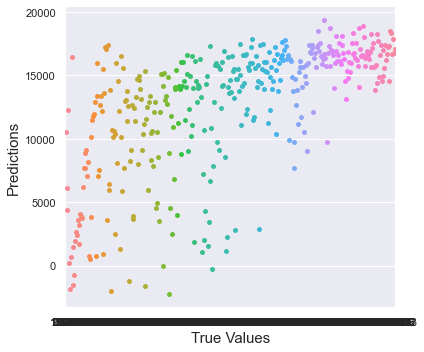

In [50]:
plt.figure(figsize=(6,5))
y_pred=Final_mod.predict(X_test)
sns.swarmplot(Y_test.round(2), y_pred)
print('\033[1m'+' True Values Vs Predicted Value plot :' +'\033[0m')
plt.xlabel('True Values' , fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.tight_layout()

In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
import joblib

# Normalize the input data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define and train the Lasso model
lasso_model = Lasso(alpha=0.5, fit_intercept=True, max_iter=250, random_state=32, selection='random')
lasso_model.fit(X_train_scaled, Y_train)

# Save the model
joblib.dump(lasso_model, 'IMDB_Ph3_4_F_Gross_Collection_Prediction.AS')

['IMDB_Ph3_4_F_Gross_Collection_Prediction.AS']